<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Impute Missing Values**


Estimated time needed: **30** minutes


In this lab, you will practice essential data wrangling techniques using the Stack Overflow survey dataset. The primary focus is on handling missing data and ensuring data quality. You will:

- **Load the Data:** Import the dataset into a DataFrame using the pandas library.

- **Clean the Data:** Identify and remove duplicate entries to maintain data integrity.

- **Handle Missing Values:** Detect missing values, impute them with appropriate strategies, and verify the imputation to create a complete and reliable dataset for analysis.

This lab equips you with the skills to effectively preprocess and clean real-world datasets, a crucial step in any data analysis project.


## Objectives


In this lab, you will perform the following:


-   Identify missing values in the dataset.

-   Apply techniques to impute missing values in the dataset.
  
-   Use suitable techniques to normalize data in the dataset.


-----


#### Install needed library


In [1]:
!pip install pandas

### Step 1: Import Required Libraries


In [2]:
import pandas as pd

### Step 2: Load the Dataset Into a Dataframe


#### **Read Data**
<p>
The functions below will download the dataset into your browser:
</p>


In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 3. Finding and Removing Duplicates
##### Task 1: Identify duplicate rows in the dataset.


In [5]:
## Write your code here
duplicate = df[df.duplicated()]
duplicate

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat


##### Task 2: Remove the duplicate rows from the dataframe.



In [6]:
## Write your code here
df = df.drop_duplicates()

### Step 4: Finding Missing Values
##### Task 3: Find the missing values for all columns.


In [7]:
## Write your code here
missing_values = df.isnull().sum().reset_index()
headers = ['column','count']
missing_values.columns = headers
missing_values.sort_values(by='count', ascending=False, inplace=False).reset_index(drop=True)

,column,count
0,AINextMuch less integrated,64289
1,AINextLess integrated,63082
2,AINextNo change,52939
3,AINextMuch more integrated,51999
4,EmbeddedAdmired,48704
...,...,...
109,MainBranch,0
110,Age,0
111,Employment,0
112,Check,0


##### Task 4: Find out how many rows are missing in the column RemoteWork.


In [10]:
## Write your code here
missing_values[missing_values['column']=='RemoteWork']

,column,count
4,RemoteWork,10631


### Step 5. Imputing Missing Values
##### Task 5: Find the value counts for the column RemoteWork.


In [11]:
## Write your code here
df['RemoteWork'].value_counts()

RemoteWork
Hybrid (some remote, some in-person)    23015
Remote                                  20831
In-person                               10960
Name: count, dtype: int64

##### Task 6: Identify the most frequent (majority) value in the RemoteWork column.



In [13]:
## Write your code here
most_frequent = df['RemoteWork'].mode()[0]
most_frequent

'Hybrid (some remote, some in-person)'

##### Task 7: Impute (replace) all the empty rows in the column RemoteWork with the majority value.



In [15]:
## Write your code here
df['RemoteWork'].fillna(most_frequent, inplace=True)

##### Task 8: Check for any compensation-related columns and describe their distribution.



Compensation-related columns: ['CompTotal', 'AIComplex', 'ConvertedCompYearly']


,CompTotal,ConvertedCompYearly
count,3.374000e+04,2.343500e+04
mean,2.963841e+145,8.615529e+04
std,5.444117e+147,1.867570e+05
min,0.000000e+00,1.000000e+00
25%,6.000000e+04,3.271200e+04
50%,1.100000e+05,6.500000e+04
75%,2.500000e+05,1.079715e+05
max,1.000000e+150,1.625660e+07


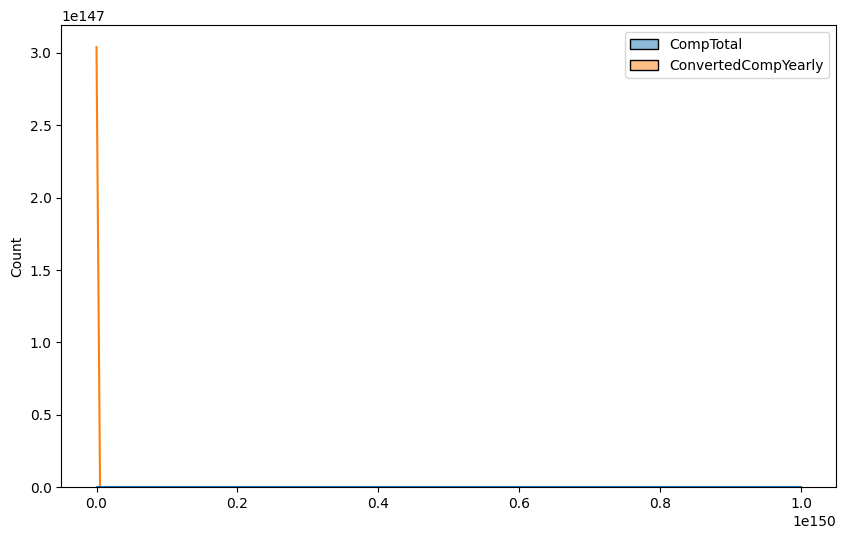

In [24]:
## Write your code here
compensation_columns = [col for col in df.columns if 'Comp' in col or 'Salary' in col or 'Pay' in col]
print("Compensation-related columns:", compensation_columns)
dfcomp = df[['CompTotal','ConvertedCompYearly']]

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(dfcomp, kde=True, color='blue', bins=30)


dfcomp.describe()

### Summary 


**In this lab, you focused on imputing missing values in the dataset.**

- Use the <code>pandas.read_csv()</code> function to load a dataset from a CSV file into a DataFrame.

- Download the dataset if it's not available online and specify the correct file path.



<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11-05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-29|1.2|Madhusudhan Moole|Updated lab|
|2024-09-27|1.1|Madhusudhan Moole|Updated lab|
|2024-09-26|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
